# Aula 2: Selecionando Métodos e Ajustando Modelos

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
http://conteudo.icmc.usp.br/pessoas/francisco <br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

Nessa aula vamos aprender a ajustar modelos e verificar quando ocorre overfitting. Vamos fazer o ajuste de um conjunto de pontos a partir de um polinômio, usando um método de regressão linear, que veremos em detalhes nas próximas aulas.

Vamos gerar os dados a partir uma função definida:

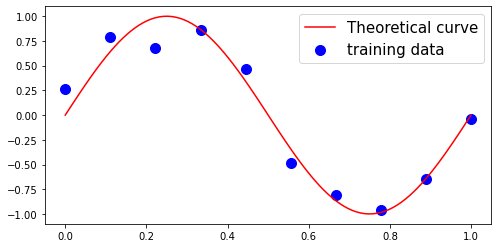

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.sin(2 * np.pi * x)
    return y

# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)


# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

Os dados que temos acesso são os pontos em azul. A curva em vermelho é desconhecida, mas a mostramos para entender como os dados são gerados.

Vamos fazer o ajuste usando um polinômio de grau $M$. Inicialmente, vamos considerar $M=1$, ou seja, um ajuste linear.

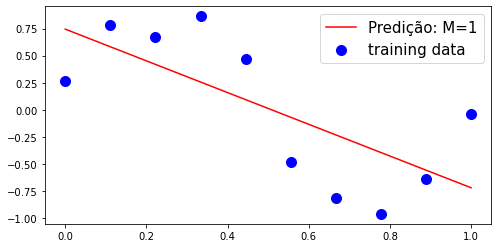

In [2]:
from sklearn import linear_model

# usa regressão linear para ajustar o modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Notamos que, nesse caso, o ajuste é muito ruim, pois os dados foram gerados a partir de uma função não-linear.

Vamos fazer o ajuste usando um polinômio de grau $M=3$. Veja sobre a função para gerar o polinômio no link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

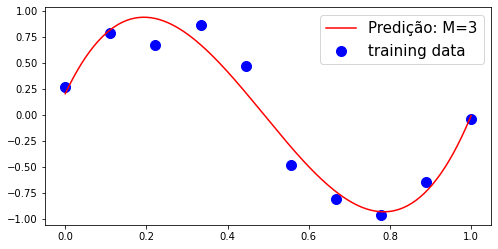

In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
model = linear_model.LinearRegression()
model.fit(X,y_train)

# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)    # .fit_transform gera a matriz X de acordo com o grau do polinômio escolhido
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

In [4]:
# Olhando X
X

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568, 0.00137174],
       [1.        , 0.22222222, 0.04938272, 0.01097394],
       [1.        , 0.33333333, 0.11111111, 0.03703704],
       [1.        , 0.44444444, 0.19753086, 0.0877915 ],
       [1.        , 0.55555556, 0.30864198, 0.17146776],
       [1.        , 0.66666667, 0.44444444, 0.2962963 ],
       [1.        , 0.77777778, 0.60493827, 0.47050754],
       [1.        , 0.88888889, 0.79012346, 0.70233196],
       [1.        , 1.        , 1.        , 1.        ]])

Nesse caso, o ajuste reproduz melhor a tendência observada nos dados.

Vamos verificar para um polinômio de grau $M=9$.

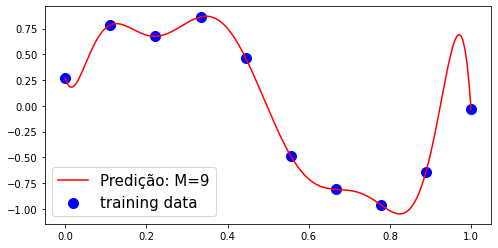

In [5]:
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Para um polinômio de grau $M=9$, a curva se ajusta a todos os pontos. Em princícipio, esse parece ser o melhor ajuste.

O ajuste foi feito no conjunto de treinamento. Precisamos agora analisar a capacidade de generalização do modelo. Para isso, vamos fazer a previsão em novos dados, ou seja, no conjunto de teste.

Vamos analisar o erro na predição em função do grau do polinômio. O erro é calculando quando consideramos o conjunto de treinamento e teste, onde obtemos duas curvas distintas.

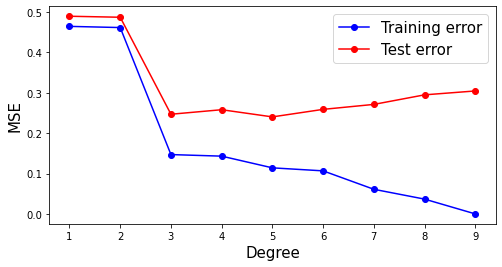

In [6]:
#Funcao para calcular o erro quadrático médio
def mse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = mse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = mse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Notem que o erro na predição, quando usamos o conjunto de teste, tende a aumentar quando aumentamos o grau do polinômio, ou seja, quando aumentamos a complexidade do modelo. Essa é uma indicação de overfitting (veja material da aula teórica). Overfitting ocorre quando há um aumento no erro calculado no conjunto de teste. Notem que o erro no conjunto de treinamento vai a zero quando aumentamos o grau do polinômio. Nesse caso, a curva se ajusta a todos os pontos, como vimos anteriormente para $M = 9$.

Se aumentarmos o número de elementos no conjunto de treinamento, reduzimos o overfitting. Ou seja, precisamos balancear a complexidade do modelo de acordo com o volume de dados disponíveis. Vamos gerar os dados como anteriormente, mas com mais pontos.

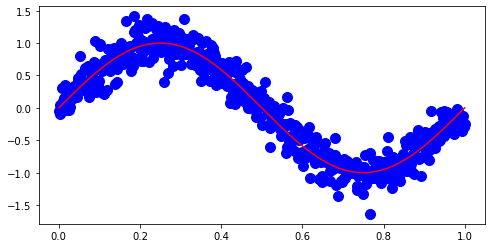

In [7]:
fig = plt.figure(figsize=(8, 4))

N_train = 500
x_train=np.linspace(0, 1,N_train)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 500
x_test=np.linspace(0, 1,N_test)
y_test = np.sin(2 * np.pi * x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Theoretical curves
xt=np.linspace(0, 1,N_test)
yt = np.sin(2 * np.pi * xt) 
plt.plot(xt,yt, '-r')
plt.show(True)

Para um polinômio de grau $M=9$, vemos que com mais pontos, overfitting deixa de ocorrer.

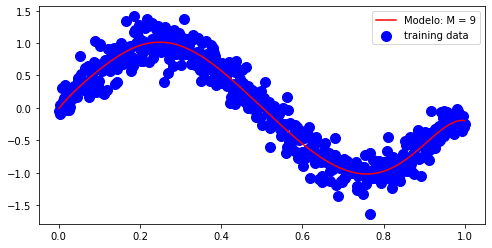

In [8]:
fig = plt.figure(figsize=(8, 4))

poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
clf9 = linear_model.LinearRegression()
clf9.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = clf9.predict(Xplot)
plt.plot(xplot, Y_pred, '-r',  label='Modelo: M = 9')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")
plt.legend()
plt.show(True)

Além disso, podemos até usar polinômios de grau maior. Analisando o erro em função do grau do polinômio, vemos que ocorre overfitting apenas para polinômios de grau muito alto.

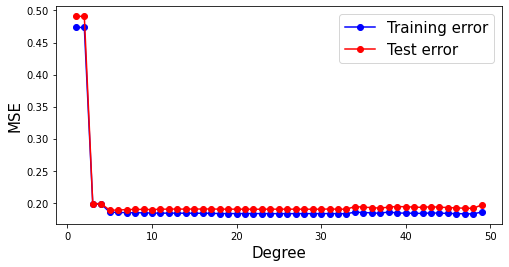

In [9]:
def mse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
degree = []
for M in np.arange(1,50):    
    poly = PolynomialFeatures(degree=M)
    X_train = poly.fit_transform(x_train)
    clf = linear_model.LinearRegression()
    clf.fit(X_train,y_train)
    Y_pred = clf.predict(X_train)
    error_train = mse(Y_pred,y_train)
    training_errors.append(error_train)
    
    X_test=poly.fit_transform(x_test)
    Y_pred2 = clf.predict(X_test)
    error_test = mse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Ou seja, quanto mais dados estiverem disponíveis, maior pode ser a complexidade do modelo. Temos que ter uma balanço entre complexidade do modelo e dados disponíveis.

## Validação cruzada

O método de validação cruzada é usado na escolha do modelo. Além disso, podemos usar o método para escolher o melhor conjunto de parâmetros de um classificador ou regressor. Notem que os dados são divididos em dois conjuntos, um de teste e outro de treinamento. Aplicamos validação cruzada ao conjunto de treinamento, para posterior avaliação do modelo no conjunto de teste.

Vamos considerar os dados da flor iris.

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Selecionamos os conjuntos de treinamento e teste.

In [11]:
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

Vamos usar validação cruzada para encontrar o melhor número de vizinhos. 

k: 1 Average accurace: 0.9583333333333333
k: 2 Average accurace: 0.9499999999999998
k: 3 Average accurace: 0.9583333333333333
k: 4 Average accurace: 0.9583333333333333
k: 5 Average accurace: 0.9583333333333333
k: 6 Average accurace: 0.9666666666666666
k: 7 Average accurace: 0.9749999999999999
k: 8 Average accurace: 0.9666666666666666
k: 9 Average accurace: 0.9749999999999999
k: 10 Average accurace: 0.9583333333333333
k: 11 Average accurace: 0.9749999999999999
k: 12 Average accurace: 0.9583333333333333
k: 13 Average accurace: 0.9583333333333333
k: 14 Average accurace: 0.9583333333333333
k: 15 Average accurace: 0.9666666666666666
k: 16 Average accurace: 0.9499999999999998
k: 17 Average accurace: 0.9583333333333333
k: 18 Average accurace: 0.9583333333333333
k: 19 Average accurace: 0.9499999999999998
Melhor k: 7


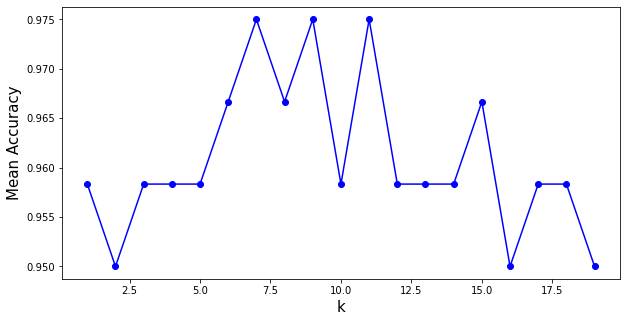

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 10 #number of folds
vk = []
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    print('k:', k, 'Average accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1 # the index of the vector starts in zero
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Mean Accuracy', fontsize = 15)
plt.show()

Vamos usar o melhor valor de k para classificar os dados de teste.

In [13]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.9666666666666667


Vamos repetir a classificação para a base de dados de câncer de mama.

In [14]:
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

# CSV file
data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
print(data.shape)
data.head(25)

(683, 11)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


Convertemos para o formato de arrays do numpy para facilitar o acesso aos dados.

In [15]:
#data = data.to_numpy()
data = data.values
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecionamos os conjuntos de teste e treinamento.

In [16]:
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

Vamos fazer a validação cruzada.

k: 1 Accuracy: 0.5822222222222223
k: 2 Accuracy: 0.6428282828282829
k: 3 Accuracy: 0.607979797979798
k: 4 Accuracy: 0.6391245791245791
k: 5 Accuracy: 0.5915151515151515
k: 6 Accuracy: 0.6391245791245791
k: 7 Accuracy: 0.6282491582491583
k: 8 Accuracy: 0.6502356902356903
k: 9 Accuracy: 0.6301346801346802
k: 10 Accuracy: 0.6575084175084176
k: 11 Accuracy: 0.651986531986532
k: 12 Accuracy: 0.6556565656565657
k: 13 Accuracy: 0.6557912457912458
k: 14 Accuracy: 0.6649494949494951
k: 15 Accuracy: 0.6631313131313131
k: 16 Accuracy: 0.6594949494949495
k: 17 Accuracy: 0.6650168350168351
k: 18 Accuracy: 0.6594612794612795
k: 19 Accuracy: 0.6521212121212121
k: 20 Accuracy: 0.664949494949495
k: 21 Accuracy: 0.6631313131313131
k: 22 Accuracy: 0.6705050505050505
k: 23 Accuracy: 0.6686868686868687
k: 24 Accuracy: 0.6686868686868687
k: 25 Accuracy: 0.6742087542087543
k: 26 Accuracy: 0.6706060606060606
k: 27 Accuracy: 0.676060606060606
k: 28 Accuracy: 0.6706060606060606
k: 29 Accuracy: 0.677878787878788

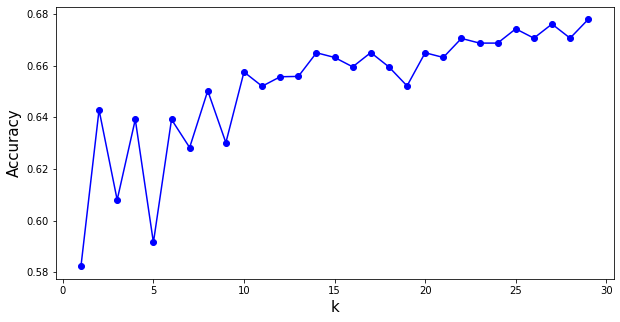

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 10 #number of folds
vk = []
vscore = []
for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    print('k:', k, 'Accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Aplicando ao conjunto de teste, podemos agora realizara classificação, usando todo o conjunto de treinamento na classificação.

In [18]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.6642335766423357


## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

### 1 - Para um polinômio de grau $M=9$, avalie como o erro se comporta quando aumentamos o tamanho do conjunto de treinamento. Considere N=10 até 1000. Ou seja, faça um gráfico de N versus o erro quadrático médio (RMSE). O erro deve ser calculado usando o conjunto de teste.

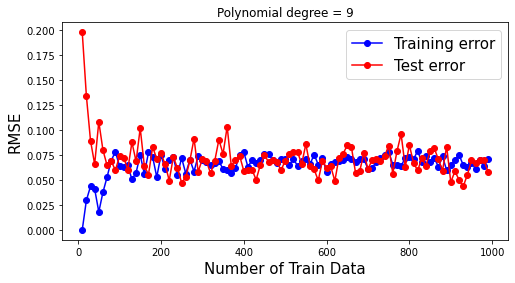

In [19]:
# gerando o conjunto de treino e teste para N_train entre 10 e 1000

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.sin(2 * np.pi * x)
    return y

# Função Raiz do Erro Quadrático Médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)**2))

training_errors = []
test_errors = []
number_train = []
for N_train in np.arange(10,1000,10): #start, stop, step
    poly = PolynomialFeatures(degree=9)
    sigma = 0.2
    x_train= np.linspace(0, 1,N_train)
    y_train = function(x_train) + np.random.normal(0,sigma, N_train)
    x_train = x_train.reshape(len(x_train), 1)
    X_train = poly.fit_transform(x_train)
    clf = linear_model.LinearRegression()
    clf.fit(X_train,y_train)
    Y_pred = clf.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)
    
    N_test = 100
    x_test=np.linspace(0, 1,N_test)
    y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
    x_test = x_test.reshape(len(x_test), 1)
    X_test=poly.fit_transform(x_test)
    Y_pred2 = clf.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    number_train.append(N_train)
    
fig = plt.figure(figsize=(8, 4))
plt.title('Polynomial degree = 9')
plt.plot(number_train, training_errors, 'b-o', label = 'Training error')
plt.plot(number_train, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Number of Train Data", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

### 2 - Troque a função seno por $x^6$ nos exemplos acima e realize a mesma análise apresentada nessa aula.

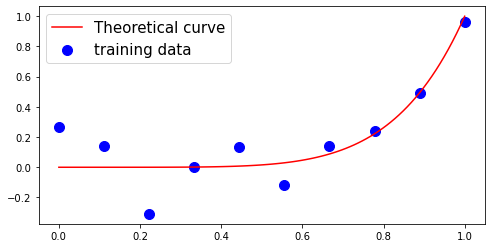

In [20]:
# Vamos gerar os dados a partir de uma função definida
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = x ** 6
    return y

# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)


# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

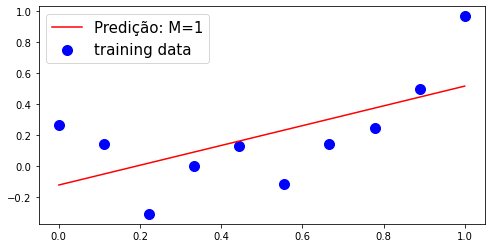

In [21]:
# Ajuste com polinômio de grau M = 1
from sklearn import linear_model

# usa regressão linear para ajustar o modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

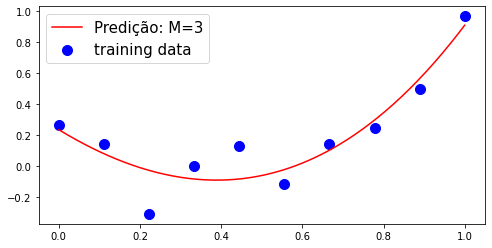

In [22]:
# Ajuste com polinômio de grau M = 3
from sklearn.preprocessing import PolynomialFeatures
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
model = linear_model.LinearRegression()
model.fit(X,y_train)

# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)    # .fit_transform gera a matriz X de acordo com o grau do polinômio escolhido
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

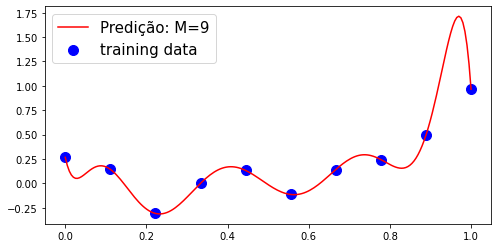

In [23]:
# Ajuste com polinômio de grau M = 9
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

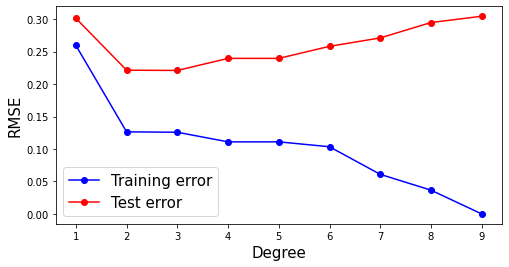

In [24]:
# Análise do Erro em função do grau M do polinômio
#Funcao para calcular a raiz do erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

### 3 - Verifique como a acurácia muda em função do número de grupos k na validação cruzada, conforme feito acima, para a base de dados Vehicle.

In [25]:
# Repetindo a classificação com modelo KNN para a base de dados Vehicle
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

# CSV file
data = pd.read_csv('data/Vehicle.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
print(data.shape)
data.head(25)

(846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [26]:
# Convertemos para o formato de arrays do numpy para facilitar o acesso aos dados.
#data = data.to_numpy()
data = data.values
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [27]:
# Selecionamos os conjuntos de teste e treinamento.
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

k: 1 Accuracy: 0.6493415276558385
k: 2 Accuracy: 0.6242098331870061
k: 3 Accuracy: 0.6493854258121159
k: 4 Accuracy: 0.6625987708516242
k: 5 Accuracy: 0.6643546971027217
k: 6 Accuracy: 0.6568481123792801
k: 7 Accuracy: 0.6539947322212467
k: 8 Accuracy: 0.6450834064969271
k: 9 Accuracy: 0.6451273046532046
k: 10 Accuracy: 0.6376426690079017
k: 11 Accuracy: 0.6451053555750659
k: 12 Accuracy: 0.6450175592625109
k: 13 Accuracy: 0.6435030728709394
k: 14 Accuracy: 0.6435908691834944
k: 15 Accuracy: 0.6376646180860404
k: 16 Accuracy: 0.6392230026338893
k: 17 Accuracy: 0.6303555750658472
k: 18 Accuracy: 0.6303116769095698
k: 19 Accuracy: 0.6228928884986831
k: 20 Accuracy: 0.6228709394205444
k: 21 Accuracy: 0.6287971905179983
k: 22 Accuracy: 0.6258560140474101
k: 23 Accuracy: 0.6287532923617207
k: 24 Accuracy: 0.6154302019315189
k: 25 Accuracy: 0.6021290605794556
k: 26 Accuracy: 0.6184152765583846
k: 27 Accuracy: 0.612467076382792
k: 28 Accuracy: 0.5992098331870062
k: 29 Accuracy: 0.600636523266

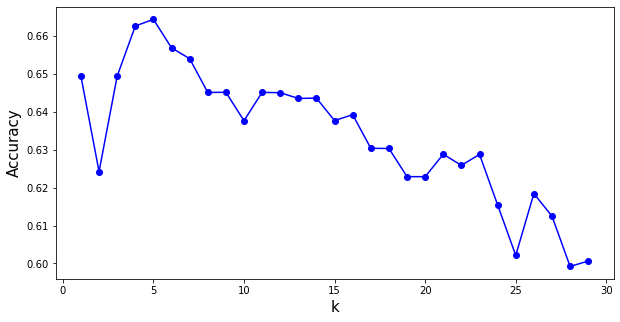

In [28]:
# Vamos fazer a validação cruzada.
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 10 #number of folds
vk = []
vscore = []
for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    print('k:', k, 'Accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [29]:
# Aplicando ao conjunto de teste, podemos agora realizar a classificação...
# ...usando todo o conjunto de treinamento na classificação.
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model4 = KNeighborsClassifier(n_neighbors=4, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy_best_k:', accuracy_score(y_pred, y_test))
print('Accuracy_k=4:', accuracy_score(y_pred, y_test))

Accuracy_best_k: 0.5764705882352941
Accuracy_k=4: 0.5764705882352941


### 4 - Varie o número de folds para a base iris, de 2 até 20 e verifique se essa escolha influencia na classificação.

In [30]:
# Considerando os dados da flor iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [31]:
# Selecionamos os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

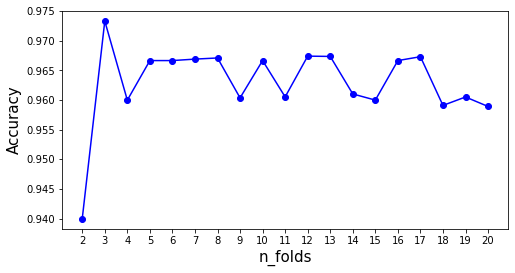

In [32]:
# Vamos usar validação cruzada e variar o número de folds para verificar a influência sobre o melhor número de vizinhos.
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

# Define o numero de folds
n_folds_values = np.arange(2, 21)

# Lista para armazenar a média de acuracia 
cv_means = []

for n_folds in n_folds_values:
    model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    cv_result = cross_validate(model, X, y, scoring='accuracy', cv=n_folds)
    cv_mean = cv_result['test_score'].mean()
    cv_means.append(cv_mean)
    
plt.figure(figsize=(8, 4))
plt.plot(n_folds_values, cv_means, '-bo')
plt.xlabel('n_folds', fontsize = 15)
plt.xticks(n_folds_values)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Podemos observar que o maior valor de acuracia é próximo a 3 folds, mas no geral a acuracia tem uma variação baixa (de 0.60 para 0.66 no melhor caso).